# **Detection of Spam Posting Accounts on Twitter**

Submitted by :
- Ankush Azade (202IT003)
- Renuka Saini (202IT021)

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
from scipy.io import arff

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Dataset**

Dataset has been taken from  http://nsclab.org/nsclab/resources/ link.

In [4]:
data = arff.loadarff("/content/drive/MyDrive/5k-random.arff")

In [5]:
df = pd.DataFrame(data[0])

In [6]:
df.rename(columns = {'class':'Class'}, inplace = True)

In [7]:
#new_class = [None]*10000
Class = df.loc[:,"Class"]
for i in range(10000):
  Class[i]=Class[i].decode('utf-8')
  #df['new_class']=new_class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
df.head()

,account_age,no_follower,no_following,no_userfavourites,no_lists,no_tweets,no_retweets,no_hashtag,no_usermention,no_urls,no_char,no_digits,Class
0,0.0,120.0,211.0,3.0,0.0,180.0,1.0,1.0,2.0,1.0,94.0,1.0,spammer
1,707.0,624.0,428.0,2507.0,0.0,12881.0,0.0,0.0,0.0,1.0,99.0,6.0,spammer
2,121.0,1.0,515.0,0.0,0.0,416.0,0.0,0.0,0.0,1.0,37.0,0.0,spammer
3,260.0,5.0,23.0,0.0,0.0,1174.0,0.0,2.0,0.0,1.0,56.0,0.0,spammer
4,624.0,983.0,159.0,11.0,2.0,42533.0,0.0,1.0,0.0,1.0,82.0,6.0,spammer


In [9]:
df.shape

(10000, 13)

**Checking for Null values**

In [10]:
df.isnull().sum()

account_age          0
no_follower          0
no_following         0
no_userfavourites    0
no_lists             0
no_tweets            0
no_retweets          0
no_hashtag           0
no_usermention       0
no_urls              0
no_char              0
no_digits            0
Class                0
dtype: int64

In [11]:
df.describe()

,account_age,no_follower,no_following,no_userfavourites,no_lists,no_tweets,no_retweets,no_hashtag,no_usermention,no_urls,no_char,no_digits
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,659.090100,2.787160e+03,1080.706100,730.414800,21.605600,1.425985e+04,499.717900,0.499400,0.391800,1.071500,65.24600,2.257800
std,528.596058,3.832586e+04,10281.993514,4310.692861,348.569682,3.712682e+04,5142.156412,1.029226,0.714243,0.328022,31.94595,3.970858
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,177.000000,1.900000e+01,62.000000,0.000000,0.000000,5.577500e+02,0.000000,0.000000,0.000000,1.000000,41.00000,0.000000
50%,574.000000,2.230000e+02,266.000000,8.000000,0.000000,2.846500e+03,0.000000,0.000000,0.000000,1.000000,61.00000,0.000000
75%,1017.000000,6.995000e+02,726.000000,182.250000,2.000000,1.284900e+04,0.000000,1.000000,1.000000,1.000000,91.00000,4.000000
max,2589.000000,1.879442e+06,738060.000000,165706.000000,26958.000000,1.036464e+06,115372.000000,14.000000,7.000000,6.000000,140.00000,56.000000


In [12]:
df['new_Class']=df.Class.apply( lambda x: 1 if x == 'spammer' else 0)

In [13]:
df.head()

,account_age,no_follower,no_following,no_userfavourites,no_lists,no_tweets,no_retweets,no_hashtag,no_usermention,no_urls,no_char,no_digits,Class,new_Class
0,0.0,120.0,211.0,3.0,0.0,180.0,1.0,1.0,2.0,1.0,94.0,1.0,spammer,1
1,707.0,624.0,428.0,2507.0,0.0,12881.0,0.0,0.0,0.0,1.0,99.0,6.0,spammer,1
2,121.0,1.0,515.0,0.0,0.0,416.0,0.0,0.0,0.0,1.0,37.0,0.0,spammer,1
3,260.0,5.0,23.0,0.0,0.0,1174.0,0.0,2.0,0.0,1.0,56.0,0.0,spammer,1
4,624.0,983.0,159.0,11.0,2.0,42533.0,0.0,1.0,0.0,1.0,82.0,6.0,spammer,1


In [14]:
df.tail()

,account_age,no_follower,no_following,no_userfavourites,no_lists,no_tweets,no_retweets,no_hashtag,no_usermention,no_urls,no_char,no_digits,Class,new_Class
9995,366.0,258.0,218.0,219.0,0.0,6568.0,210.0,0.0,1.0,1.0,117.0,4.0,non-spammer,0
9996,1559.0,4592.0,90.0,127.0,107.0,12669.0,0.0,0.0,0.0,1.0,46.0,0.0,non-spammer,0
9997,909.0,45.0,238.0,6.0,0.0,354.0,0.0,0.0,0.0,1.0,23.0,0.0,non-spammer,0
9998,354.0,3807.0,3723.0,114.0,11.0,34529.0,0.0,0.0,0.0,1.0,114.0,0.0,non-spammer,0
9999,808.0,21.0,37.0,7.0,0.0,2876.0,0.0,0.0,0.0,1.0,66.0,4.0,non-spammer,0


# **Information about dataset features**

- account_age	: The age (days) of an account since its creation until  the time of sending the most recent tweet
- no_follower :	The number of followers of this twitter user
- no_following :	The number of followings/friends of this twitter user
- no_userfavourites :	The number of favourites this twitter user received
- no_lists : The number of lists this twitter user added
- no_tweets	: The number of tweets this twitter user sent
- no_retweets :	The number of retweets this tweet
- no_hashtag :	The number of hashtags included in this tweet
- no_usermention : The number of user mentions included in this tweet
- no_urls	: The number of URLs included in this tweet
- no_char	: The number of characters in this tweet
- no_digits	: The number of digits in this tweet

# **Categorization of Features**

**Account Information Feature (AIF):**
 - Account age

**Pairwise Engagement Feature:**
1. Engage-with Features (EwF)
  - friends_count
  - no_char
  - URLsRatio
  - MentionsRatio
  - Friendship

2. Engaged-by Features (EbF)
  - no_followers
  - no_userfavourites
  - Followership


# **Feature Selection and Analysis**

**Friendship**

In [15]:
#Friendship = friends_count/followers_count
followers= df.loc[:,"no_follower"]
friends = df.loc[:, "no_following"]
Friendship = [None]*10000
for i in range(9999):
  if followers[i]==0 :
    Friendship[i] = 0
  if followers[i]>0 :
    Friendship[i] = friends[i]/followers[i]
df['Friendship'] = Friendship

Text(0.5, 1.0, 'Friendship plot')

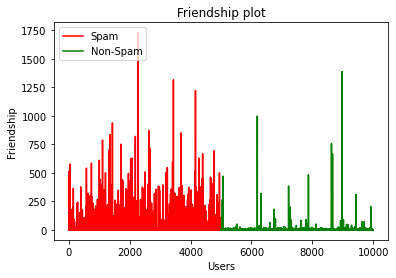

In [16]:
Spam_user = df[df.new_Class==1]
Non_spam_user = df[df.new_Class==0]
plt.plot(Spam_user.Friendship, color='red', label='Spam')
plt.plot(Non_spam_user.Friendship, color='green', label='Non-Spam')
plt.legend(loc='upper left')
plt.xlabel('Users')
plt.ylabel('Friendship')
plt.title('Friendship plot')

**Analysis:**
 - From the graph we observed that, spam accounts have high friendship value as compared to legit accounts. The spam/bot accounts tend to follow a lot of users but are not followed by many users due to which we see this imbalance in the ratio resulting in high values unlike in the case of non-spam accounts and hence this feature shows a promising distinction between spam and non-spam users.

**Followership**

In [17]:
#Followership = followers_count/friends_count
followers = df.loc[:,"no_follower"]
friends = df.loc[:, "no_following"]
Followership = [None]*10000
for i in range(10000):
  if friends[i]==0 :
    Followership[i] = 0
  elif friends[i]>0 :
    Followership[i] = followers[i]/friends[i]
df['Followership'] = Followership

Text(0.5, 1.0, 'Followership plot')

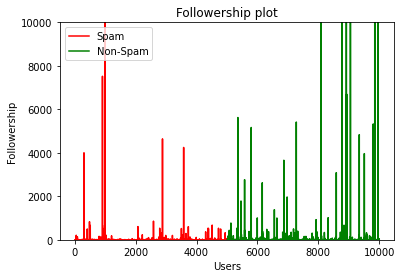

In [18]:
Spam_user = df[df.new_Class==1]
Non_spam_user = df[df.new_Class==0]
plt.plot(Spam_user.Followership, color='red', label='Spam')
plt.plot(Non_spam_user.Followership, color='green', label='Non-Spam')
plt.legend(loc='upper left')
plt.ylim(0,10000)
plt.xlabel('Users')
plt.ylabel('Followership')
plt.title('Followership plot')

**Analysis:**
- Followership can be considered as inverse property of friendship and leads as a good distinction between spam and non spam users. Legit users observe higher followership than spam accounts as seen in the graph.

**MentionsRatio**

In [19]:
#MentionsRatio
mentions = df.loc[:,"no_usermention"]
tweet_length = df.loc[:, "no_char"]
MentionsRatio = [None]*10000
for i in range(10000):
  if tweet_length[i] ==0 :
    MentionsRatio[i]  =0
  elif tweet_length[i]>0 :
    MentionsRatio[i] = mentions[i]/tweet_length[i]
df['MentionsRatio'] = MentionsRatio

Text(0.5, 1.0, 'Mentions Ratio plot')

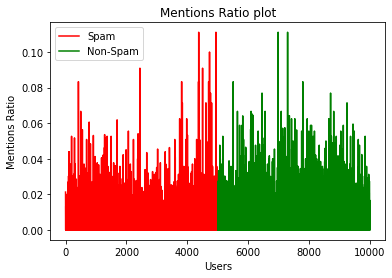

In [20]:
Spam_user = df[df.new_Class==1]
Non_spam_user = df[df.new_Class==0]
plt.plot(Spam_user.MentionsRatio, color='red', label='Spam')
plt.plot(Non_spam_user.MentionsRatio, color='green', label='Non-Spam')
plt.legend(loc='upper left')
plt.xlabel('Users')
plt.ylabel('Mentions Ratio')
plt.title('Mentions Ratio plot')

**Analysis:**
 - Spam account tend to tag/mention a lot of users in order to spread spam information. Although legitimate users also tend to tag/mention other users which is seen from the graph.

**URLsRatio**

In [21]:
#URLsRatio
urls = df.loc[:,"no_urls"]
tweet_length = df.loc[:, "no_char"]
URLRatio = [None]*10000
for i in range(10000):
  if urls[i]>0 :
    URLRatio[i] = urls[i]//tweet_length[i]
df['URLRatio'] = URLRatio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


Text(0.5, 1.0, 'URLs Ratio plot')

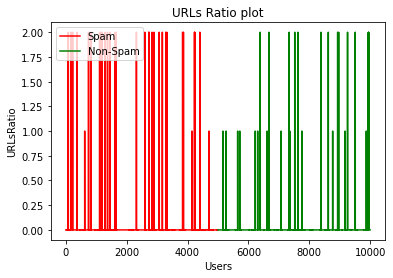

In [22]:
Spam_user = df[df.new_Class==1]
Non_spam_user = df[df.new_Class==0]
plt.plot(Spam_user.URLRatio, color='red', label='Spam')
plt.plot(Non_spam_user.URLRatio, color='green', label='Non-Spam')
plt.legend(loc='upper left')
plt.xlabel('Users')
plt.ylabel('URLsRatio')
plt.title('URLs Ratio plot')

**Analysis:**
- This graph represents the number of urls contained in a tweet with respect to spam and legit account.

**Tweet_Retweet Ratio**

In [23]:
#Tweet_Retweet = no_tweets/no_retweets
tweet = df.loc[:,"no_tweets"]
retweet = df.loc[:, "no_retweets"]
re_tweet = [None]*10000
for i in range(10000):
  if retweet[i]>0 :
    re_tweet[i] = tweet[i]/retweet[i]
df['Tweet_Retweet'] = re_tweet

(0.0, 200000.0)

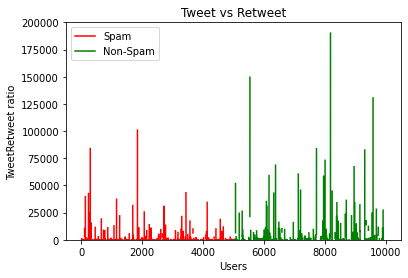

In [24]:
Spam_user = df[df.new_Class==1]
Non_spam_user = df[df.new_Class==0]
plt.plot(Spam_user.Tweet_Retweet, color='red', label='Spam')
plt.plot(Non_spam_user.Tweet_Retweet, color='green', label='Non-Spam')
plt.legend(loc='upper left')
plt.xlabel('Users')
plt.ylabel('TweetRetweet ratio')
plt.title('Tweet vs Retweet')
plt.ylim(0,200000)

**Tweet vs Retweet analysis for Spam Accounts**

Text(0.5, 1.0, 'TweetRetweet for spam accounts')

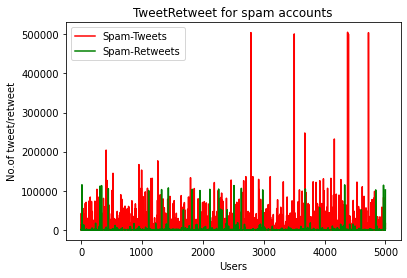

In [25]:
#tweet vs retweet for spam accounts
Spam_user = df[df.new_Class==1]
plt.plot(Spam_user.no_tweets, color='red', label='Spam-Tweets')
plt.plot(Spam_user.no_retweets, color='green', label='Spam-Retweets')
plt.legend(loc='upper left')
plt.xlabel('Users')
plt.ylabel('No.of tweet/retweet')
plt.title('TweetRetweet for spam accounts')

**Tweet vs Retweet analysis for non spam accounts**

Text(0.5, 1.0, 'Tweet Retweet for Non-spam accounts')

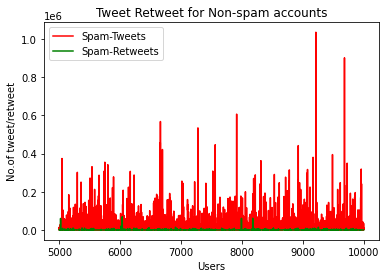

In [26]:
#tweet vs retweet for non_spam accounts
Spam_user = df[df.new_Class==1]
plt.plot(Non_spam_user.no_tweets, color='red', label='Spam-Tweets')
plt.plot(Non_spam_user.no_retweets, color='green', label='Spam-Retweets')
plt.legend(loc='upper left')
plt.xlabel('Users')
plt.ylabel('No.of tweet/retweet')
plt.title('Tweet Retweet for Non-spam accounts')

**Analysis:**
 - Spam accounts tweet frequency is quite high but retweet frequency is comparatively low, whereas for a legitimate user tweet frequency is similar to retweet frequency in most of the cases. 

**Tweet_frequency : Average number of tweets per day**

In [27]:
#Tweet_frequency = no_tweets/account_age
tweet = df.loc[:,"no_tweets"]
age = df.loc[:, "account_age"]
tweet_freq = [None]*10000
for i in range(10000):
  if age[i]>0 :
    tweet_freq[i] = tweet[i]/age[i]
df['tweet_freq'] = tweet_freq

Text(0.5, 1.0, 'Tweet frequency plot')

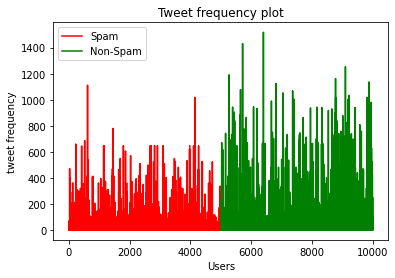

In [28]:
Spam_user = df[df.new_Class==1]
Non_spam_user = df[df.new_Class==0]
plt.plot(Spam_user.tweet_freq, color='red', label='Spam')
plt.plot(Non_spam_user.tweet_freq, color='green', label='Non-Spam')
plt.legend(loc='upper left')
plt.xlabel('Users')
plt.ylabel('tweet frequency')
plt.title('Tweet frequency plot')

**Analysis:**
 - For a spam account the tweet frequency is hardly dependant on account age whereas for a legitimate user it takes a while to increase its frequency with age.

Text(0.5, 1.0, 'Non-Spam Account age vs No. of Followers')

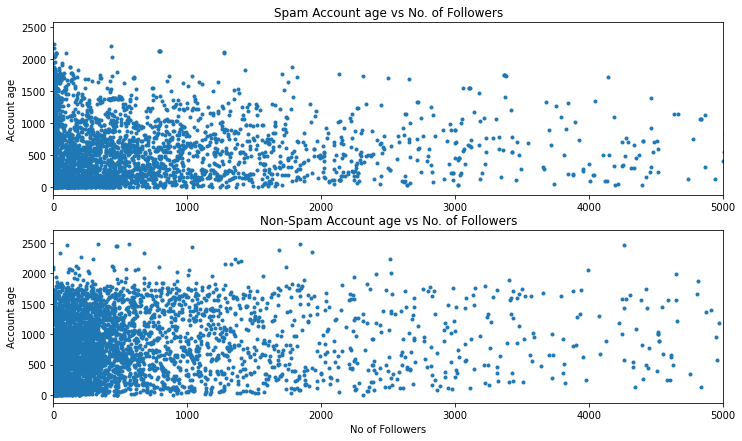

In [29]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
x=Spam_user.no_follower
y=Spam_user.account_age
plt.scatter(x,y,marker='.')
plt.ylabel('Account age')
plt.title('Spam Account age vs No. of Followers')
plt.xlim(0,5000)
plt.subplot(2,1,2)
x1=Non_spam_user.no_follower
y1=Non_spam_user.account_age
plt.scatter(x1,y1,marker='.')
plt.xlim(0,5000)
plt.xlabel('No of Followers')
plt.ylabel('Account age')
plt.title('Non-Spam Account age vs No. of Followers')

**Analysis:**
   - A spam account makes a number of followers at a very young age, unlike a legit account which gradually increases its count of followers with age.

**Favourites vs AccountAge**

Text(0.5, 1.0, 'Non-Spam Account age vs No.of Favourites')

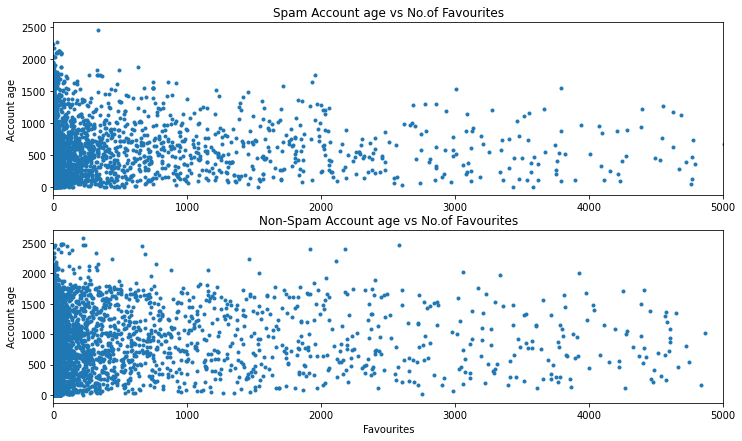

In [30]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
x=Spam_user.no_userfavourites
y=Spam_user.account_age
plt.scatter(x,y,marker='.')
plt.xlim(0,5000)
plt.ylabel('Account age')
plt.title('Spam Account age vs No.of Favourites')
plt.subplot(2,1,2)
x1=Non_spam_user.no_userfavourites
y1=Non_spam_user.account_age
plt.scatter(x1,y1,marker='.')
plt.xlim(0,5000)
plt.xlabel('Favourites')
plt.ylabel('Account age')
plt.title('Non-Spam Account age vs No.of Favourites')

**Analysis:**
 - Number of favourites for a twitter account increase with age, based on the activity of the account and liking of its content by other users. By observing this graph, it seems that there's not much distinction between spam and legitimate accounts.

**Correlation**

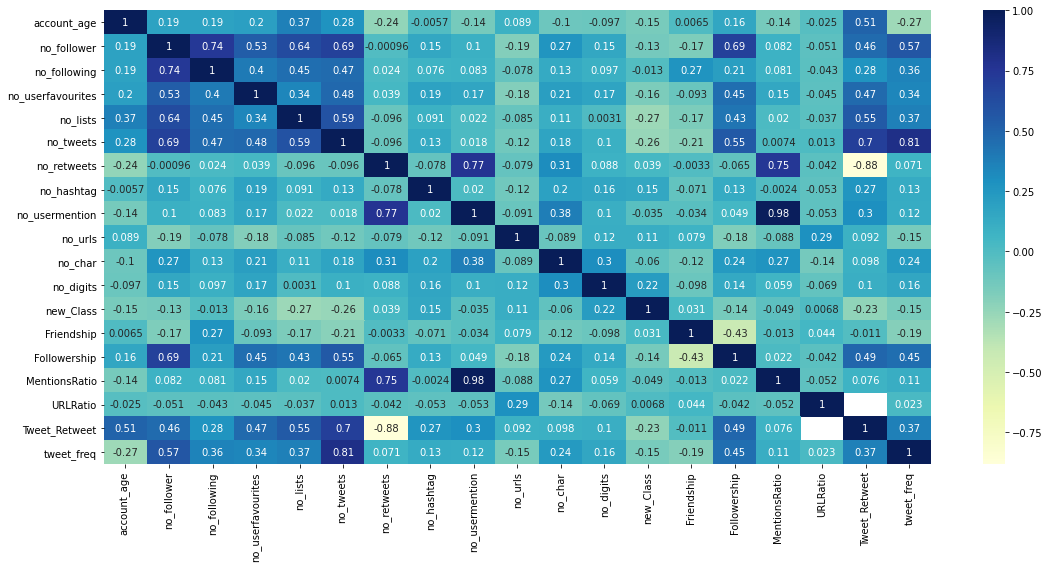

In [31]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(method='spearman'), cmap='YlGnBu', annot=True)
plt.tight_layout()
plt.show()

# **Creating Feature Sets**

After analysing the relevant features, we have created a feature set comprising of all promising features. Further, we have also created three subsets of this feature set in order to observe the effect on classification accuracy using random forest classifier corresponding to each.

In [32]:
features1 = ['account_age', 'no_following', 'no_follower','no_userfavourites','no_usermention','no_lists','no_tweets','no_retweets','no_hashtag','no_char','no_urls','no_digits','Followership', 'Friendship', 'new_Class']

In [33]:
features2 = ['Followership', 'Friendship', 'no_following', 'no_follower', 'new_Class']

In [34]:
features3 = ['account_age','no_userfavourites','no_usermention','no_lists','new_Class']

In [35]:
features4 = ['no_tweets','no_retweets','no_hashtag','no_char','no_urls','no_digits','new_Class']

In [36]:
df = df.dropna(axis = 0, how ='any') 

# **Random Forest Classifier**

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [39]:
def random_forest(X,y):

  rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

  rf = rf.fit(X_train, y_train)
  y_pred_train = rf.predict(X_train)
  y_pred_test = rf.predict(X_test)

  print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
  print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

**Feature Set 1**

In [40]:
X = df[features1].iloc[:,:-1]
y = df[features1].iloc[:,-1]
random_forest(X,y)

Trainig Accuracy: 0.77264
Test Accuracy: 0.76292


**Feature set 2**

In [41]:
X = df[features2].iloc[:,:-1]
y = df[features2].iloc[:,-1]
random_forest(X,y)

Trainig Accuracy: 0.65016
Test Accuracy: 0.60486


**Feature set 3**

In [42]:
X = df[features3].iloc[:,:-1]
y = df[features3].iloc[:,-1]
random_forest(X,y)

Trainig Accuracy: 0.69577
Test Accuracy: 0.68997


**Feature set 4**

In [43]:
X = df[features4].iloc[:,:-1]
y = df[features4].iloc[:,-1]
random_forest(X,y)

Trainig Accuracy: 0.74332
Test Accuracy: 0.74164


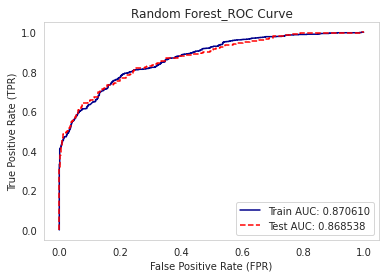

In [61]:
X = df[features1].iloc[:,:-1]
y = df[features1].iloc[:,-1]
sns.set_style("whitegrid", {'axes.grid' : False})
rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rf = rf.fit(X_train, y_train)
scores_train = rf.predict_proba(X_train)
scores_test = rf.predict_proba(X_test)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc1 = accuracy_score(y_test, y_pred_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_rf_test, tpr_rf_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.title("Random Forest_ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

# Comparision of Training/Testing Accuracy for different feature sets

| Feature Sets | Training Accuracy | Testing Accuracy |
| --- | --- | --- |
| Feature Set 1 | 77.26 | 76.29 |
| Feature Set 2 | 65.01 | 60.48 |
| Feature Set 3 | 69.57 | 68.99 |
| Feature Set 4 | 74.33 | 74.16 |

# **Decision Tree Classifier**

In [44]:
#Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def decision_tree(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
  DT_clf = DecisionTreeClassifier(criterion='entropy')
  DT_clf = DT_clf.fit(X_train, y_train)
  y_pred_train = DT_clf.predict(X_train)
  y_pred_test = DT_clf.predict(X_test)

  print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
  print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

**Feature Set 1**

In [45]:
X = df[features1].iloc[:,:-1]
y = df[features1].iloc[:,-1]
decision_tree(X,y)

Training Accuracy: 1.00000
Test Accuracy: 0.82827


**Feature Set 2**

In [46]:
X = df[features2].iloc[:,:-1]
y = df[features2].iloc[:,-1]
decision_tree(X,y)

Training Accuracy: 0.96417
Test Accuracy: 0.61094


**Feature Set 3**

In [47]:
X = df[features3].iloc[:,:-1]
y = df[features3].iloc[:,-1]
decision_tree(X,y)

Training Accuracy: 0.97264
Test Accuracy: 0.66565


**Feature Set 4**

In [48]:
X = df[features4].iloc[:,:-1]
y = df[features4].iloc[:,-1]
decision_tree(X,y)

Training Accuracy: 1.00000
Test Accuracy: 0.81307


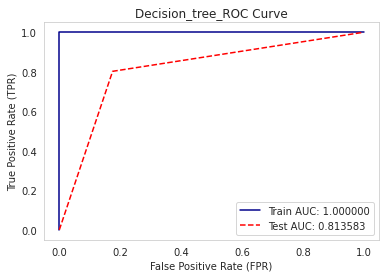

In [63]:
X = df[features4].iloc[:,:-1]
y = df[features4].iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
DT_clf = DecisionTreeClassifier(criterion='entropy')
DT_clf = DT_clf.fit(X_train, y_train)
y_pred_test = DT_clf.predict(X_test)
acc2 = accuracy_score(y_test, y_pred_test)
sns.set_style("whitegrid", {'axes.grid' : False})
scores_train_dt = DT_clf.predict_proba(X_train)
scores_test_dt = DT_clf.predict_proba(X_test)

y_scores_train_dt = []
y_scores_test_dt = []
for i in range(len(scores_train_dt)):
    y_scores_train_dt.append(scores_train_dt[i][1])

for i in range(len(scores_test_dt)):
    y_scores_test_dt.append(scores_test_dt[i][1])
    
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_scores_train_dt, pos_label=1)
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_scores_test_dt, pos_label=1)

plt.plot(fpr_dt_train, tpr_dt_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_dt_test, tpr_dt_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.title("Decision_tree_ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

# Comparision of Training/Testing Accuracy for different feature sets

| Feature Sets | Training Accuracy | Testing Accuracy |
| --- | --- | --- |
| Feature Set 1 | 100.00 | 82.83 |
| Feature Set 2 | 96.41 | 61.09 |
| Feature Set 3 | 97.26 | 66.56 |
| Feature Set 4 | 100.00|81.31 |

# **Naive Bayes Classifier**

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
def naive(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
  gnb = GaussianNB()
  y_pred = gnb.fit(X_train, y_train)
  y_pred_train = gnb.predict(X_train)
  y_pred_test = gnb.predict(X_test)
  print("Train Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
  print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

**Feature set 1**

In [51]:
X = df[features1].iloc[:,:-1]
y = df[features1].iloc[:,-1]
naive(X,y)

Train Accuracy: 0.59349
Test Accuracy: 0.59726


**Feature set 2**

In [52]:
X = df[features2].iloc[:,:-1]
y = df[features2].iloc[:,-1]
naive(X,y)

Train Accuracy: 0.52182
Test Accuracy: 0.51368


**Feature set 3**

In [53]:
X = df[features3].iloc[:,:-1]
y = df[features3].iloc[:,-1]
naive(X,y)

Train Accuracy: 0.64691
Test Accuracy: 0.65350


**Feature set 4**

In [54]:
X = df[features4].iloc[:,:-1]
y = df[features4].iloc[:,-1]
naive(X,y)

Train Accuracy: 0.61433
Test Accuracy: 0.64590


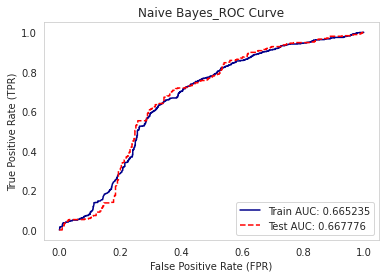

In [65]:
X = df[features3].iloc[:,:-1]
y = df[features3].iloc[:,-1]
sns.set_style("whitegrid", {'axes.grid' : False})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)
y_pred_test = gnb.predict(X_test)
acc3 = accuracy_score(y_test, y_pred_test)
scores_train_nb = gnb.predict_proba(X_train)
scores_test_nb = gnb.predict_proba(X_test)

y_scores_train_nb = []
y_scores_test_nb = []
for i in range(len(scores_train_nb)):
    y_scores_train_nb.append(scores_train_nb[i][1])

for i in range(len(scores_test_nb)):
    y_scores_test_nb.append(scores_test_nb[i][1])
    
fpr_nb_train, tpr_nb_train, _ = roc_curve(y_train, y_scores_train_nb, pos_label=1)
fpr_nb_test, tpr_nb_test, _ = roc_curve(y_test, y_scores_test_nb, pos_label=1)

plt.plot(fpr_nb_train, tpr_nb_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_nb_train, tpr_nb_train))
plt.plot(fpr_nb_test, tpr_nb_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_nb_test, tpr_nb_test))
plt.title("Naive Bayes_ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

# Comparision of Training/Testing Accuracy for different feature sets

| Feature Sets | Training Accuracy | Testing Accuracy |
| --- | --- | --- |
| Feature Set 1 | 59.35 | 59.73 |
| Feature Set 2 | 52.18 | 51.37 |
| Feature Set 3 | 64.69 | 65.35 |
| Feature Set 4 | 61.43 | 64.59 |

# **Model Comparision**

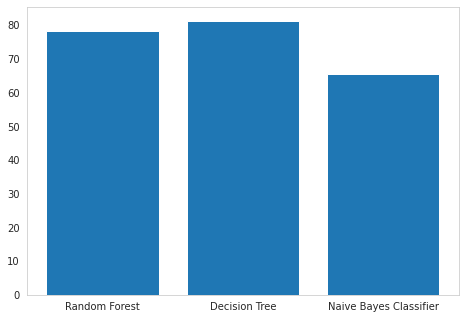

In [69]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Random Forest', 'Decision Tree', 'Naive Bayes Classifier']
Accuracy = [acc1*100, acc2*100, acc3*100]
ax.bar(models,Accuracy)
plt.show()